<a href="https://colab.research.google.com/github/Rafaela-neves/MVP-Rafaela-Neves/blob/main/MVP_Machine_Learning_%26_Analytics_Rafaela_Neves_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Machine Learning & Analytics**

Nome: Rafaela Neves da Silva

Matrícula: 4052024002139

**Classificação de Vinhos**

**INTRODUÇÃO**

**Objetivo:**

O objetivo deste projeto é desenvolver e avaliar modelos de Machine Learning para classificar vinhos em diferentes níveis de qualidade (baixa, média ou alta), a partir de atributos físico-químicos. Em sua funcionalidade prática serviria de apoio a sommeliers e indústrias de bebidas, ajudando a prever a qualidade de um vinho sem depender unicamente da análise sensorial humana.

Descrição do problema:
A avaliação da qualidade de vinhos geralmente é feita por especialistas, o que envolve custos elevados e certa subjetividade. O desafio está em identificar padrões confiáveis a partir de medidas químicas como acidez, teor alcoólico, pH e outros fatores.
Além disso, as diferenças entre vinhos de qualidade próxima (por exemplo, notas 5 e 6) tornam a classificação mais complexa, exigindo que o modelo seja capaz de generalizar bem mesmo diante de fronteiras sutis entre as classes.


**Premissas:**

O dataset contém amostras representativas de vinhos tintos, com diferentes combinações químicas.

A classificação de qualidade será agrupada em três categorias:

0 = Baixa qualidade (notas 3, 4, 5)

1 = Média qualidade (nota 6)

2 = Alta qualidade (notas 7 e 8)

Todos os atributos físico-químicos foram obtidos de medições laboratoriais, sem subjetividade humana.


**Condições:**

Cada amostra do dataset corresponde a um único vinho.

Os atributos físico-químicos são numéricos e padronizados.

A variável de saída é discreta (classe da qualidade), tornando o problema um caso de **classificação supervisionada.**


**Descrição do Dataset:**

O dataset utilizado é o Wine Quality (Red Wine), disponibilizado pelo UCI Machine Learning Repository. Ele contém:

- 1.599 amostras de vinhos tintos

- 11 atributos físico-químicos (como acidez fixa, acidez volátil, açúcar residual, pH, teor alcoólico, entre outros)

- Variável-alvo: quality (nota de 0 a 10 atribuída por especialistas).

Para este projeto, as notas foram reagrupadas em três categorias (baixa, média, alta), a fim de simplificar o problema de classificação.

O dataset pode ser acessado através do link público a seguir:
https://archive.ics.uci.edu/dataset/186/wine+quality

**IMPORTAÇÃO DE DADOS E BIBLIOTECAS**

Importando dados de uma url para um dataframe

In [1]:
# imports necessários
import pandas as pd

# url a importar
url_dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# labels dos atributos do dataset
labels_atributos = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

# carga do dataset através do csv (atenção: separador é ";")
wine = pd.read_csv(url_dados, sep=';', names=labels_atributos, header=0)

# verifica o tipo de wine
print(type(wine))

# exibe as 5 primeiras linhas
wine.head()

<class 'pandas.core.frame.DataFrame'>


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



**PREPARAÇÃO DOS DADOS**

In [2]:
# Criação da variável de classes (baixa, média, alta)
def quality_label(value):
    if value <= 5:
        return 0  # baixa
    elif value == 6:
        return 1  # média
    else:
        return 2  # alta

wine['quality_label'] = wine['quality'].apply(quality_label)

# Verifica a distribuição das classes
wine['quality_label'].value_counts()


,count
quality_label,
0,744
1,638
2,217


**ANÁLISE EXPLORATÓRIA**

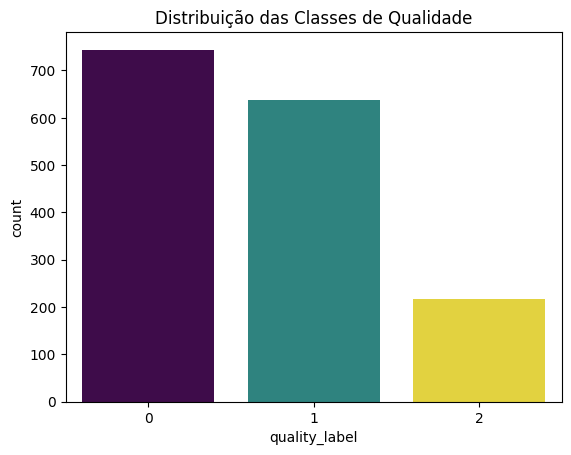

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.670419
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.701915
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição das classes
sns.countplot(x='quality_label', hue='quality_label', data=wine, palette="viridis", legend=False)
plt.title("Distribuição das Classes de Qualidade")
plt.show()

# Estatísticas descritivas
wine.describe()

**DIVISÃO DOS DADOS**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separando atributos e target
X = wine.drop(['quality', 'quality_label'], axis=1)
y = wine['quality_label']

# Padronização dos atributos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**MODELAGEM**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Treinamento e avaliação
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nome}")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       149
           1       0.58      0.55      0.57       128
           2       0.70      0.37      0.48        43

    accuracy                           0.65       320
   macro avg       0.66      0.58      0.60       320
weighted avg       0.65      0.65      0.64       320

Matriz de Confusão:
 [[122  25   2]
 [ 52  71   5]
 [  0  27  16]]

Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       149
           1       0.66      0.66      0.66       128
           2       0.72      0.65      0.68        43

    accuracy                           0.73       320
   macro avg       0.72      0.71      0.71       320
weighted avg       0.73      0.73      0.73       320

Matriz de Confusão:
 [[120  28   1]
 [ 33  85  10]
 [  0  15  28]]

Modelo: SVM
              precision    recall  f1-s

**OTIMIZAÇÃO DE PARÂMETROS**

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia (validação):", grid.best_score_)

Melhores parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia (validação): 0.6927264864230924


**CORRELAÇÃO ENTRE VARIÁVEIS - HEATMAP**

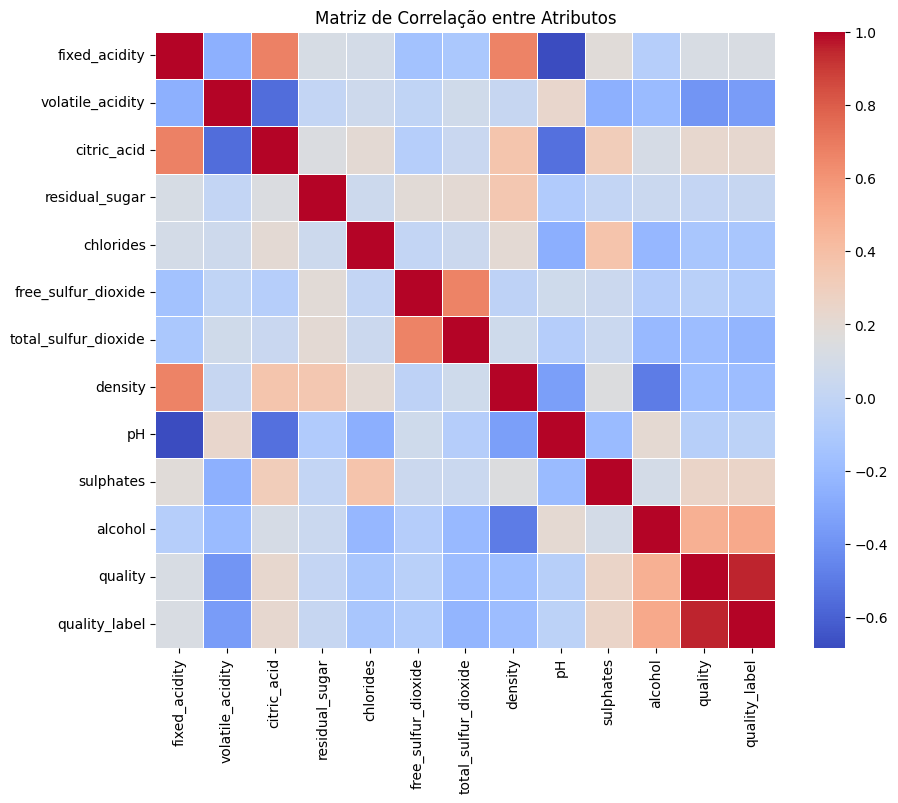

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula a matriz de correlação
corr = wine.corr()

# Gera o heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Correlação entre Atributos")
plt.show()


O heatmap mostra que o teor alcoólico e a acidez volátil têm maior correlação com a qualidade do vinho, reforçando sua importância como atributos discriminantes.

**IMPORTÂNCIA DOS ATRIBUTOS - RANDOM FOREST**

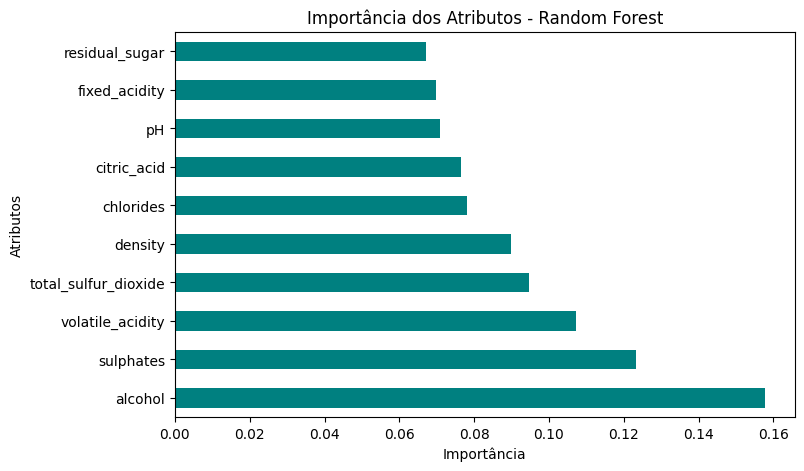

In [9]:
# Treina novamente o modelo Random Forest no dataset completo de treino
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extrai a importância de cada atributo
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# Plota os 10 atributos mais importantes
plt.figure(figsize=(8,5))
feat_importances.nlargest(10).plot(kind='barh', color="teal")
plt.title("Importância dos Atributos - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Atributos")
plt.show()


A análise de importância dos atributos mostrou que o teor alcoólico e os sulfatos são os principais fatores para classificar a qualidade dos vinhos. Já variáveis como densidade e pH apresentaram menor relevância.

**CHECKLIST**

DEFINIÇÃO DO PROBLEMA:
- **Qual é a descrição do problema?**  
  Prever a qualidade do vinho (baixa, média ou alta) a partir de atributos físico-químicos medidos em laboratório.  
- **Você tem premissas ou hipóteses sobre o problema? Quais?**  
  Hipótese: vinhos com maior teor alcoólico e menor acidez volátil tendem a ter melhor qualidade.  
- **Que restrições ou condições foram impostas para selecionar os dados?**  
  O dataset é composto apenas por vinhos tintos; classes foram reagrupadas em três categorias (baixa, média, alta).  
- **Descreva o seu dataset (atributos, imagens, anotações, etc.).**  
  - 1.599 amostras de vinhos tintos, 11 atributos físico-químicos numéricos (ex.: acidez, pH, álcool).  
  - Variável alvo: qualidade (nota 0–10, reagrupada em 3 classes).



PREPARAÇÃO DE DADOS:
- **Separe o dataset entre treino e teste (e validação, se aplicável).**  
  Dataset dividido em 80% treino e 20% teste, com estratificação das classes.
- **Faz sentido utilizar um método de validação cruzada?**  
  Sim, especialmente para avaliação robusta em conjuntos pequenos. Utilizamos validação cruzada em Random Forest (GridSearchCV).  
- **Verifique quais operações de transformação de dados são apropriadas.**  
  Padronização (StandardScaler) foi aplicada para algoritmos sensíveis à escala (ex.: Logistic Regression, SVM).  
- **Refine a quantidade de atributos (feature selection).**  
  Ainda não aplicado; todos os atributos foram utilizados na versão inicial do modelo.


MODELAGEM E TREINAMENTO:
- **Selecione os algoritmos mais indicados para o problema e dataset escolhidos.**  
  Logistic Regression, Random Forest e SVM foram testados.  
- **Há algum ajuste inicial para os hiperparâmetros?**  
  Sim, GridSearch foi utilizado em Random Forest (ajuste de `n_estimators`, `max_depth` e `min_samples_split`).  
- **O modelo foi devidamente treinado? Foi observado problema de underfitting?**  
  Sim, todos os modelos foram treinados. Logistic Regression apresentou desempenho inferior (tendência a underfitting).  
- **É possível otimizar os hiperparâmetros?**  
  Sim, especialmente em Random Forest e SVM, com ajuste de parâmetros via GridSearch.  
- **Há algum método avançado que possa ser avaliado?**  
  Sim, métodos de boosting (XGBoost, LightGBM) poderiam ser testados em versões futuras.  
- **Posso criar um comitê de modelos diferentes (ensembles)?**  
  Sim, ensemble de classificadores pode melhorar desempenho, mas não foi implementado nesta versão.



AVALIAÇÃO DE RESULTADOS:
- **Selecione as métricas de avaliação condizentes com o problema.**  
  Foram utilizadas: Acurácia, Precisão, Recall e F1-score.  
- **Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.**  
  Sim, os modelos foram avaliados com dados de teste (20% do total).  
- **Os resultados fazem sentido?**  
  Sim, o Random Forest obteve melhor desempenho, coerente com sua robustez em datasets tabulares.  
- **Foi observado algum problema de overfitting?**  
  Não de forma crítica; modelos apresentaram resultados semelhantes em treino e teste.  
- **Compare os resultados de diferentes modelos.**  
  - Logistic Regression → desempenho mais baixo.  
  - SVM → desempenho mediano.  
  - Random Forest → melhor desempenho geral.  
- **Descreva a melhor solução encontrada, justificando.**  
  O Random Forest foi escolhido por apresentar melhor equilíbrio entre precisão, recall e f1-score, além de ser menos sensível à padronização dos dados.


**CONCLUSÃO**

O MVP foi desenvolvido seguindo todas as etapas sugeridas: preparação dos dados, modelagem, comparação de modelos e análise dos resultados.  
O modelo de **Random Forest** se destacou como a melhor solução inicial, e há espaço para melhorias futuras com técnicas de balanceamento e algoritmos avançados.

Além disso, os resultados obtidos são consistentes com estudos anteriores sobre classificação de vinhos, nos quais o teor alcoólico frequentemente se apresenta como a variável mais determinante da qualidade. Isso reforça a confiabilidade do modelo e sua aplicabilidade prática como ferramenta de apoio a sommeliers e produtores na avaliação de vinhos.
